In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

## Costume Dataset

In [2]:

class SimpleDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data) #returns the size of the dataset

    def __getitem__(self, index):
        sample = self.data[index]
        label = self.labels[index]
        return sample, label #returns a sample and its label at a given index
    
data = torch.rand(100, 10) # 100 sample, 10 feature
labels = torch.randint(0, 2, (100, )) # Binary classification labels (0 or 1)

dataset = SimpleDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Loading Dataset

In [3]:
from torchvision import datasets, transforms

#Defind transformation to preprocess the data (e.g., normalization)
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL to tensor
    transforms.Normalize((0.1307,), (0.3081,)) #Normalize for MNIST
])

# Load MNIST dataset
train_dataset = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

## Defind Model

In [4]:
import torch.nn as nn
import torch.nn.functional as F #for activation functions

class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) #First fully connected layer
        self.relu = nn.ReLU() #ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes) #Output layer
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    


In [5]:
# Example
input_size = 784
hidden_size = 128
num_classes = 10
model = SimpleDNN(input_size, hidden_size, num_classes)

## Choose loss func


In [6]:
import torch.optim as optim

# Loss func for multi-class classification (if num_classes >2) or binary (if num_classes == 2)
criterion = nn.CrossEntropyLoss() # Or nn.BCEWithLogitsLoss

# Optimizer (Adam is a good general choice)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training loop

In [10]:
num_epochs = 10

train_losses = []
val_losses = []

def validate(model, dataloader, criterion):
        model.eval() #Set model to evaluation mode (important for batch normalization, dropout)
        total_loss = 0
        correct_predictions = 0
        total_sample = 0

        with torch.no_grad(): #Disable gradient calculations during validation (for efficiency)
            for data, labels in dataloader:
                data = data
                labels = labels
                outputs = model(data)
                loss = criterion(outputs, labels)
                total_loss += loss.item()

                _, predicted_labels = torch.max(outputs.data, 1) #For classification, get predicted class indices
                total_sample += labels.size(0)
                correct_predictions += (predicted_labels==labels).sum().item()

        avg_loss = total_loss / len(dataloader)
        accuracy = 100 * correct_predictions / total_sample
        val_losses.append(avg_loss)
        return avg_loss, accuracy
    


for epoch in range(num_epochs):
    for batch_idx, (data, labels) in enumerate(train_dataloader):
        data = data
        labels = labels

        #Zero gradients
        optimizer.zero_grad()

        #Forward pass: compute model outputs
        
        outputs = model(data)



        #Calculate loss
        loss = criterion(outputs, labels)

        #Backforward pass: compute gradients
        loss.backward()

        #Optimization step: update weights
        optimizer.step()

        # Print training stat, good for monitoring
        if (batch_idx+1) % 10 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}')
            print(f'Batch: [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')


    avg_train_loss = loss.item() / len(train_dataloader)
    train_losses.append(avg_train_loss)

    val_loss, val_accuracy = validate(model, test_dataloader, criterion)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')
    model.train()


print('Finish')

Epoch: 1/10
Batch: [10/938], Loss: 0.0295
Epoch: 1/10
Batch: [20/938], Loss: 0.0018
Epoch: 1/10
Batch: [30/938], Loss: 0.0180
Epoch: 1/10
Batch: [40/938], Loss: 0.0035
Epoch: 1/10
Batch: [50/938], Loss: 0.0016
Epoch: 1/10
Batch: [60/938], Loss: 0.0174
Epoch: 1/10
Batch: [70/938], Loss: 0.0011
Epoch: 1/10
Batch: [80/938], Loss: 0.0445
Epoch: 1/10
Batch: [90/938], Loss: 0.0042
Epoch: 1/10
Batch: [100/938], Loss: 0.0192
Epoch: 1/10
Batch: [110/938], Loss: 0.0012
Epoch: 1/10
Batch: [120/938], Loss: 0.0207
Epoch: 1/10
Batch: [130/938], Loss: 0.0007
Epoch: 1/10
Batch: [140/938], Loss: 0.0470
Epoch: 1/10
Batch: [150/938], Loss: 0.0250
Epoch: 1/10
Batch: [160/938], Loss: 0.0253
Epoch: 1/10
Batch: [170/938], Loss: 0.0082
Epoch: 1/10
Batch: [180/938], Loss: 0.0042
Epoch: 1/10
Batch: [190/938], Loss: 0.0110
Epoch: 1/10
Batch: [200/938], Loss: 0.0016
Epoch: 1/10
Batch: [210/938], Loss: 0.0068
Epoch: 1/10
Batch: [220/938], Loss: 0.0040
Epoch: 1/10
Batch: [230/938], Loss: 0.0051
Epoch: 1/10
Batch: [

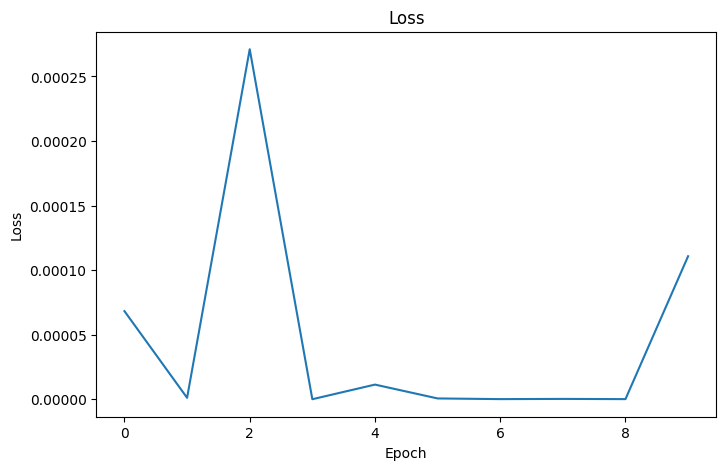

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
train_losses


[6.826044812893817e-05,
 1.1310135739158466e-06,
 0.00027108481570855896,
 3.8760476748147274e-08,
 1.1369068699795555e-05,
 6.412066566918705e-07,
 1.2267343657734647e-07,
 2.8253437008962895e-07,
 1.1738682506300176e-07,
 0.00011078041118345281]

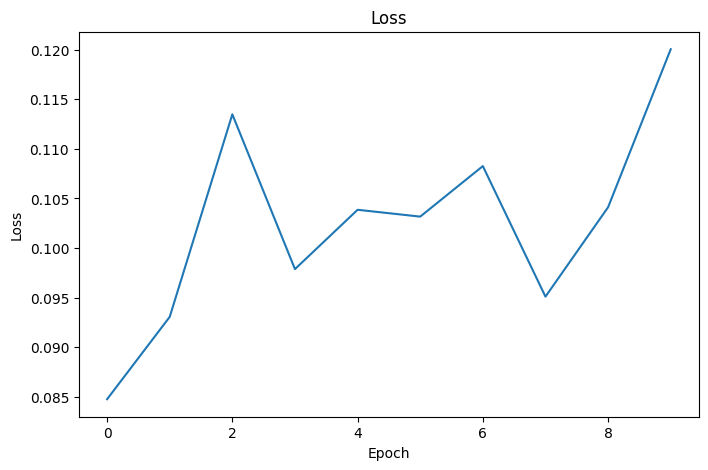

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

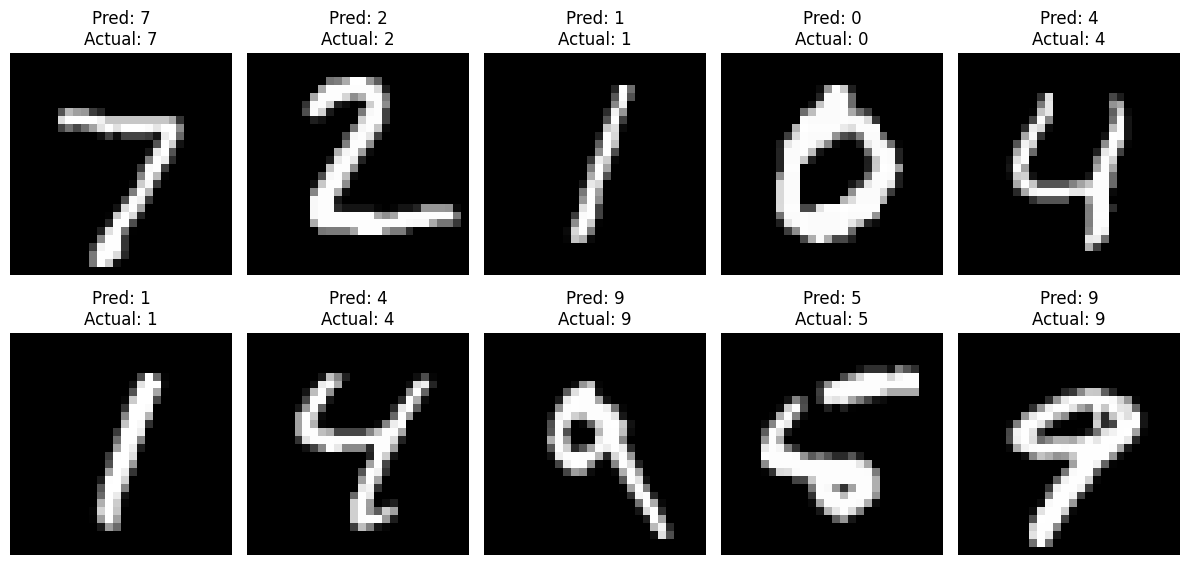

In [ ]:
data_iter = iter(test_dataloader)
images, labels = next(data_iter)
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

num_images = 10

plt.figure(figsize=(12, 6))
for idx in range(num_images):
    plt.subplot(2, 5, idx + 1)  # 2 row, 5 col
    plt.imshow(images[idx].squeeze(), cmap='gray')  # (1,28,28) -> (28,28)
    plt.title(f'Pred: {predicted[idx].item()}\nActual: {labels[idx].item()}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Save & Loading

In [8]:
torch.save(model.state_dict(), 'model.pth') #Save only the model's parameters
torch.save(model, 'full_model.pth')